Importing the libraries

In [1]:
#data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset using pandas library. The dataset is in the format of Comma separated values format. We have to import the data so that we can data analysis.

In [11]:
data=pd.read_csv('/content/drive/MyDrive/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Checking for missing values since missing values can lead to skewness in the data. If missing values are found we have to replace it with zero or median or mode values.

In [3]:
#to know the missing values of customers
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
created_at,0,0.0
payment_method,0,0.0
total_items,0,0.0
order_amount,0,0.0
user_id,0,0.0
shop_id,0,0.0
order_id,0,0.0


There are no missing values in the dataset.

First we have to find the destribution of numerical values in the dataset. We can find the mean , standard deviation, min or max values in the dataset. 

In [5]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [33]:
#Calculating the AOV
AOV=data.order_amount.sum()/data.order_amount.count()

3145.128

## Answer to the first question of how the value of AOV is calculated as  $3145.13?

AOV(Average Order Value) is a metric to monitor as you grow your business. Traditionally, it’s one of the first numbers business owners try to improve to increase revenue or optimize return on ad spend.

AOV= Sum of order_amount / No of orders

As you can see that mean of column 'order_amount' is 3145.128000. It can be rounded to two decimal places then the answer is 3145.13.

AOV of this dataset is wrongly calculated as $3145.13 as they took the mean of the column 'order_amount'. 

Another reason why we should not take mean as the AOV value in this case is because 
Minimum value of an order = $90,

Maximun value of an order = $704000 and

Standard deviation =41282.539.
This means that on average, the values of column 'order_amount' vary 41282.539 from the mean value.
The high values like 704000 might be the reason for mean of the order_column is high. There are outliers in the data.

## Univariate Analysis of Column 'order_amount'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


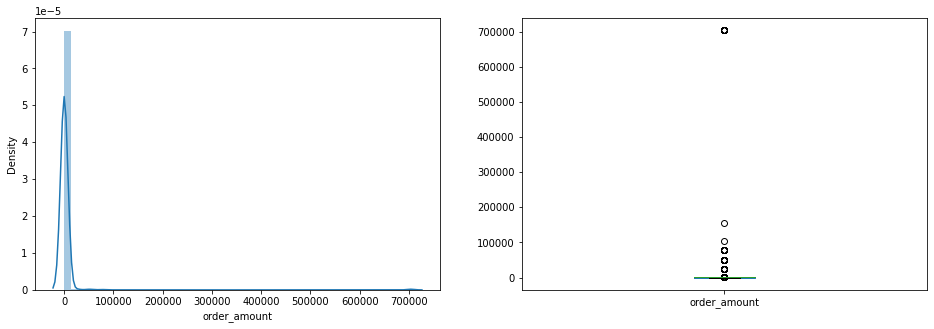

In [8]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['order_amount']);

plt.subplot(122)
data['order_amount'].plot.box(figsize=(16,5))

plt.show();

From the above graph we can understand that values of order_amount is not normally distributed. They are skewed in the low order values. And the higher order value such as  704000.000000 is an outlier.

In [49]:
df_unique=data.groupby('order_amount').size().reset_index(name='count').sort_values(by='order_amount',ascending=False)
df_unique.head()

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16


704000 is an outlier of the column order_amount.

##Calculating the median value of the column order_amount.

In [24]:
data.order_amount.mode()

0    153
dtype: int64

In [25]:
data.order_amount.value_counts()

153    87
306    85
354    82
312    75
156    75
       ..
404     1
948     1
920     1
816     1
980     1
Name: order_amount, Length: 258, dtype: int64

In [26]:
data.order_amount.median()

284.0

## What metric would you report for this dataset?

I would use mode metric for this kind of skewed data. Since mode is the value which is the most repeated value in a data. That would be much more reliable.
Chances of the bulk order for the amount of 704000 is very less. In this dataset it occured only 17 times.But the mode value of column 153 occured 87 times. The mode value is also close to the median value.

##What is its value?

The mode value of the column is 153.